# Scratch

## Modules

In [119]:
import numpy as np
import Permutations as pm
import sympy
from numpy.random import randint as ri
from QuasiCord import *

sympy.init_printing()

import itertools

import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
from tqdm.notebook import tqdm

## Translation on the area of $L < B+R - e$ 

$L < B+R-e  
\Leftrightarrow L < B+R - (T-L) 
\Leftrightarrow 0 < B+R - T
\Leftrightarrow T < B+R$

In [ ]:
N = 10
iteration_count = 200
count, error = 0, 0
for itr in tqdm(range(iteration_count)):
    sqr = square_random_generator(N)  # , True)
    # ---
    c = sqr.code
    e = c[0] - c[1]
    # ------
    alpha = abs(4 * c[3] - 2 * e + 3)  # alpha=|4r-2e+3|
    # ------
    cn = tuple([c[0] + alpha, c[1] + alpha, c[2] + 2 * alpha, c[3]])
    # ---
    if c[0] < c[2] + c[3]:  # c[1] < c[2] + c[3] - e:
        try:
            sqrn = Square(cn)
            n, nn = cc(sqr), cc(sqrn)
            if n != nn:
                print(
                    f"(B+int((R-e)/2))-L={(c[2]+int((c[3]-e)/2))-c[1]}, e={e}, r={c[3]}, alpha={alpha},  ({n},{nn}), ({c},{cn})"
                )
                count += 1
        except:
            print(c, e, alpha)
    else:
        error += 1
# ---
print(f"{count}/{iteration_count-error}")

In [ ]:
N = 20
iteration_count = 200
count, error = 0, 0
for itr in tqdm(range(iteration_count)):
    sqr = square_random_generator(N)  # , True)
    # ---
    c = sqr.code
    e = c[0] - c[1]
    # ------
    eps = abs(4 * c[2] + 2 * e - 1)  # epsilon = |4b+2e-1|
    # ------
    cn = tuple([c[0] + eps, c[1] + eps, c[2], c[3] + 2 * eps])
    # ---
    if c[0] < c[2] + c[3]:
        try:
            sqrn = Square(cn)
            n, nn = cc(sqr), cc(sqrn)
            if not n == nn:
                print(
                    f"(B+R-e)-L={(c[2]+c[3]-e)-c[1]}, e={e}, eps={eps}, ({n},{nn}), ({c},{cn})"
                )
                count += 1
        except:
            print(c, e, eps)
    else:
        error += 1
# ---
print(f"{count}/{iteration_count-error}")

## $|L, L, L-R, R| = |L+1, L, L-R, R| = |L+R+1, L, 1, R|$

In [ ]:
N = 20
for itr in tqdm(range(N * 10)):
    r = np.random.randint(1, N)
    l = r + np.random.randint(1, N)
    b = np.random.randint(1, (2 * l + 1) + 1)

    sqrs = [
        Square([l, l, l - r, r]),
        Square([l + 1, l, l - r, r]),
        Square([l + r + 1, l, 1, r]),
        Square([l + r + 1, l, b, r]),
    ]
    nums = [cc(sqr) for sqr in sqrs]
    if len(list(set(nums))) != 1:
        print([sqr.code for sqr in sqrs], [n for n in nums])

In [ ]:
r = ri(10)
t = r + ri(10)
sqrs = [Square([t, t, t - r, r]), Square([t + 1, t, t - r, r])]
print([cc(sqr) for sqr in sqrs])
for sqr in sqrs:
    sqr.graphic().show()

In [ ]:
N = 20
for itr in range(100):
    b, r, t = ri(N), ri(N), ri(N)
    try:
        sqrs = [Square([t, t, b, r]), Square([t + 1, t, b, r])]
        nums = [cc(sqr) for sqr in sqrs]
        if len(set(nums)) != 1:
            print(t - (b + r), nums)
    #         for sqr in sqrs:
    #             sqr.graphic().show()
    except:
        pass

In [ ]:
r = ri(1, 10)
t = r + ri(10)
sqrs = [
    Square([t, t, t - r, r]),
    Square([t + r + 1, t, t - r, r]),
    Square([t + r + 1, t, 1, r]),
]
print([cc(sqr) for sqr in sqrs])
for sqr in sqrs:
    sqr.graphic().show()

In [ ]:
N = 50
b, r = ri(1, N), ri(1, N)
print(b, r)
# ---
seq = []
for t in range(2 * (b + r) + 1 + 1):
    try:
        sqr = Square([t, b + r, b, r])
        num = cc(sqr)
        if len(seq) > 0 and num != seq[-1]:
            print(seq[-1], num)
            sqr.graphic().show()
    except:
        num = 0
    seq += [num]
print(seq)

In [ ]:
b, r = ri(1, 10), ri(1, 10)
print(b, r)
seq = []
for t in range(1, 100):
    try:
        num = cc(Square([b + r + t, b + r + t, b, r]))
    except:
        num = 0
    seq += [num]
print(seq)

In [ ]:
N = 5
r, b = ri(N), ri(N)
t = r + ri(N)

sqrs = [Square([t + r + 1, t, b, r]), Square([t + r + 1, t, 1, r])]
print([cc(sqr) for sqr in sqrs])
for sqr in sqrs:
    sqr.graphic().show()

In [ ]:
N = 20
for itr in tqdm(range(N * 10)):
    b, r = ri(N), ri(N)
    t = (b + r) + ri(N)

    try:
        sqrs = [
            Square([t, t, b, r]),
            Square([t + 1, t, b, r]),
            Square([t, t, b, r]),
            Square([0, b + r, b, r]),
            Square([b + 2 * r + 1, b + r, 0, r]),
        ]
        nums = [cc(sqr) for sqr in sqrs]
        if len(list(set(nums))) != 1:
            print([sqr.code for sqr in sqrs], [n for n in nums])
    except:
        print(f"\n-----\n({t},{t},{b},{r})")

## Fixing B,R

In [ ]:
N = 10
iteration_count = 100
count = 0
for itr in tqdm(range(iteration_count)):
    sqr = square_random_generator(N)  # , True)
    # ---
    c = sqr.code
    ed = 2 * c[3] + 1
    cn = [c[0] + rd, c[1] + rd, c[2] + rd, c[3]]
    # ---
    try:
        sqrn = Square(cn)
        n, nn = cc(sqr), cc(sqrn)
        if n != nn:
            print(f"({n},{nn}), ({c},{cn})")
            count += 1
    except:
        print(c, rd)
# ---
print(count)

# Drawing the fundarmental area

In [138]:
def tl_d(c):
    r = c[3]
    d = 2 * r + 1
    flag = True
    while flag:
        t, l, b = c[0], c[1], c[2]
        # ---
        cn = [t - d, l - d, b - d, r]
        try:
            c = Code(cn)
        except Exception as e:
            flag = False
    return c


def tl_b(c):
    b = c[2]
    flag = True
    while flag and b > 0:
        t, l, r = c[0], c[1], c[3]
        # ---
        cn = [t - b, l - b, b, r - b]
        try:
            c = Code(cn)
        except Exception as e:
            flag = False
    return c


def tl_D(c):
    D = abs(2 * (c[0] - c[1]) - 1)
    flag = True
    while flag and (c[0] - (c[2] + c[3]) > 0):
        t, l, b, r = c[0], c[1], c[2], c[3]
        # ---
        cn = [t - D, l - D, b, r]
        try:
            c = Code(cn)
        except Exception as e:
            flag = False
    return c

def tl_alpha(c):
    alpha = abs(4 * c[3] - 2*(c[0]-c[1]) + 3)
    flag = True
    while flag and (c[0] - (c[2] + c[3]) <= 0):
        t, l, b, r = c[0], c[1], c[2], c[3]
        # ---
        cn = [t - alpha, l - alpha, b - 2*alpha, r]
        try:
            c = Code(cn)
        except Exception as e:
            flag = False
    return c

def tl_beta(c):
    beta = abs(4 * c[2] + 2*(c[0]-c[1]) - 1)
    flag = True
    while flag and (c[0] - (c[2] + c[3]) <= 0):
        t, l, b, r = c[0], c[1], c[2], c[3]
        # ---
        cn = [t - beta, l - beta, b, r- 2*beta]
        try:
            c = Code(cn)
        except Exception as e:
            flag = False
    return c

In [156]:
N, Cnt = 100, 3000
# ---
codes = []
for itr in tqdm(range(Cnt)):
    sqr = square_random_generator(N)
    c = tl_beta(tl_alpha(tl_d(sqr.code)))
    c = tl_D(tl_b(tl_d(sqr.code)))
    # ---
    codes += [c]
# print(codes)

  0%|          | 0/3000 [00:00<?, ?it/s]

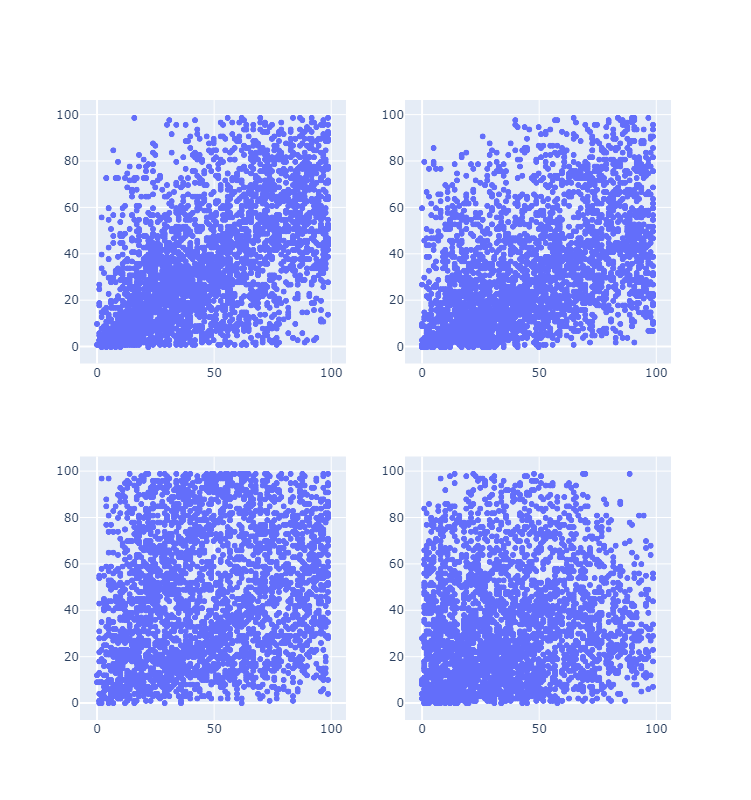

In [157]:
T, L, B, R = (
    [c[0] for c in codes],
    [c[1] for c in codes],
    [c[2] for c in codes],
    [c[3] for c in codes],
)

fig = make_subplots(2, 2)

fig.append_trace(
    px.scatter(
        x=T, y=B, range_x=[0, 2 * N], range_y=[0, 2 * N], labels={"x": "T", "y": "B"}
    ).data[0],
    1,
    1,
)
fig.append_trace(
    px.scatter(
        x=L, y=R, range_x=[0, 2 * N], range_y=[0, 2 * N], labels={"x": "L", "y": "R"}
    ).data[0],
    1,
    2,
)
fig.append_trace(
    px.scatter(
        x=T, y=L, range_x=[0, 2 * N], range_y=[0, 2 * N], labels={"x": "T", "y": "L"}
    ).data[0],
    2,
    1,
)
fig.append_trace(
    px.scatter(
        x=B, y=R, range_x=[0, 2 * N], range_y=[0, 2 * N], labels={"x": "B", "y": "R"}
    ).data[0],
    2,
    2,
)
fig.update_layout(height=800, width=800)
fig.show()